# **O Problema da Máquina de Lavar com Controle Fuzzy**



* **Entrada**

> *Grau de sujeira da roupa (X1)*:
   >> Conjuntos *fuzzy* (valores difusos): **pouca sujeira**, **média sujeira** e **grande sujeira**.

> *Manchas presentes na roupa (X2)*:
   >> Conjuntos *fuzzy* (valores difusos): **sem mancha**, **média mancha** e **grande mancha**.

*   **Saída**

> *Tempo de lavagem da máquina (Y)*
   >> Conjuntos *fuzzy* (valores difusos): **muito curto**, **curto**, **médio**, **longo** e **muito longo**.


## Base de conhecimento (regras de decisão)

> **SE** grau de sujeira é *pouca sujeira* **E** manchas na roupa é *sem mancha* **ENTÃO** tempo de lavagem é *muito curto*

> **SE** grau de sujeira é *pouca sujeira* **E** manchas na roupa é *média mancha* **ENTÃO** tempo de lavagem é *médio*

> **SE** grau de sujeira é *pouca sujeira* **E** manchas na roupa é *grande mancha* **ENTÃO** tempo de lavagem é *longo*

> **SE** grau de sujeira é *média sujeira* **E** manchas na roupa é *sem mancha* **ENTÃO** tempo de lavagem é *curto*

> **SE** grau de sujeira é *média sujeira* **E** manchas na roupa é *média mancha* **ENTÃO** tempo de lavagem é *médio*

> **SE** grau de sujeira é *média sujeira* **E** manchas na roupa é *grande mancha* **ENTÃO** tempo de lavagem é *longo*

> **SE** grau de sujeira é *grande sujeira* **E** manchas na roupa é *sem mancha* **ENTÃO** tempo de lavagem é *médio*

> **SE** grau de sujeira é *grande sujeira* **E** manchas na roupa é *média mancha* **ENTÃO** tempo de lavagem é *longo*

> **SE** grau de sujeira é *grande sujeira* **E** manchas na roupa é *grande mancha* **ENTÃO** tempo de lavagem é *muito longo*

### **Instalação do Pacote** *skfuzzy*

In [1]:
# Instale o pacote skfuzzy
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b99b9de0df1605bce4d808a50ecde46a2a5ca23324d9eb784f4ef5248ba842be
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


### Criação das **Variáveis** e de seus respectivos **Termos Lingúisticos**

In [36]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis Linguísticas
sujeira = ctrl.Antecedent(np.arange(0,101,1), 'SUJEIRA')
manchas = ctrl.Antecedent(np.arange(0,101,1), 'MANCHAS')
tempo_lavagem = ctrl.Consequent(np.arange(0,101,1), 'TEMPO_LAVAGEM')

# Conjuntos de Termos Linguísticos (membership function tipo trapezoidal)
sujeira['POUCA SUJEIRA'] = fuzz.trapmf(sujeira.universe, [0,0,30,50])
sujeira['MÉDIA SUJEIRA'] = fuzz.trapmf(sujeira.universe, [30,50,50,70])
sujeira['GRANDE SUJEIRA'] = fuzz.trapmf(sujeira.universe, [50,70,100,100])

manchas['SEM MANCHA'] = fuzz.trapmf(manchas.universe, [0,0,35,65])
manchas['MÉDIA MANCHA']  = fuzz.trapmf(manchas.universe, [35,65,100,100])
manchas['GRANDE MANCHA']  = fuzz.trapmf(manchas.universe, [65,100,150,200])

tempo_lavagem['MUITO CURTO'] = fuzz.trapmf(tempo_lavagem.universe, [0,0,35,60])
tempo_lavagem['CURTO'] = fuzz.trapmf(tempo_lavagem.universe, [35,60,60,85])
tempo_lavagem['MÉDIO'] = fuzz.trapmf(tempo_lavagem.universe, [60,85,100,100])
tempo_lavagem['LONGO'] = fuzz.trapmf(tempo_lavagem.universe, [85,100,100,100])
tempo_lavagem['MUITO LONGO'] = fuzz.trapmf(tempo_lavagem.universe, [100,100,100,100])

### Mostrando graficamente as partições dos Universos **DINHEIRO**, **PESSOAL**  e **RISCO**

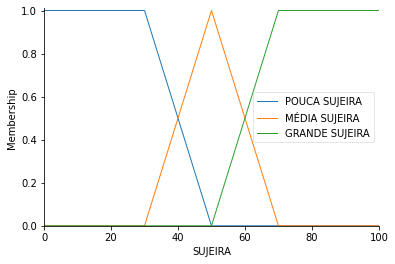

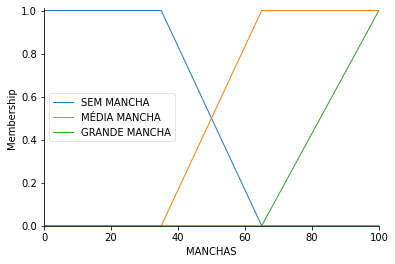

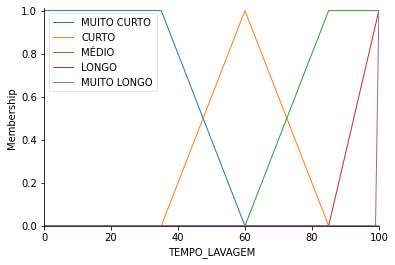

In [37]:
sujeira.view()
manchas.view()
tempo_lavagem.view()

### Criando a **Base de Regras**

In [38]:
rule1 = ctrl.Rule(sujeira['POUCA SUJEIRA'] & manchas['SEM MANCHA'], tempo_lavagem['MUITO CURTO'])
rule2 = ctrl.Rule(sujeira['POUCA SUJEIRA'] & manchas['MÉDIA MANCHA'], tempo_lavagem['MÉDIO'])
rule3 = ctrl.Rule(sujeira['POUCA SUJEIRA'] & manchas['GRANDE MANCHA'], tempo_lavagem['LONGO'])

rule4 = ctrl.Rule(sujeira['MÉDIA SUJEIRA'] & manchas['SEM MANCHA'], tempo_lavagem['CURTO'])
rule5 = ctrl.Rule(sujeira['MÉDIA SUJEIRA'] & manchas['MÉDIA MANCHA'], tempo_lavagem['MÉDIO'])
rule6 = ctrl.Rule(sujeira['MÉDIA SUJEIRA'] & manchas['GRANDE MANCHA'], tempo_lavagem['LONGO'])

rule7 = ctrl.Rule(sujeira['GRANDE SUJEIRA'] & manchas['SEM MANCHA'], tempo_lavagem['MÉDIO'])
rule8 = ctrl.Rule(sujeira['GRANDE SUJEIRA'] & manchas['MÉDIA MANCHA'], tempo_lavagem['LONGO'])
rule9 = ctrl.Rule(sujeira['GRANDE SUJEIRA'] & manchas['GRANDE MANCHA'], tempo_lavagem['MUITO LONGO'])

### Criando o **Controlador Nebuloso**, definindo os **Entradas** e calculando o **Resultado**

In [45]:
tempo_lavagem_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tempo_lavagem_simulador = ctrl.ControlSystemSimulation(tempo_lavagem_ctrl)

# Entrando com alguns valores para qualidade da dinheiro e do pessoal
tempo_lavagem_simulador.input['SUJEIRA'] = 65 
tempo_lavagem_simulador.input['MANCHAS'] = 70

#Computando o resultado
tempo_lavagem_simulador.compute()

### Apresentando **Graficamente** o **Resultado**

O tempo de lavagem será de 85.68914579319204


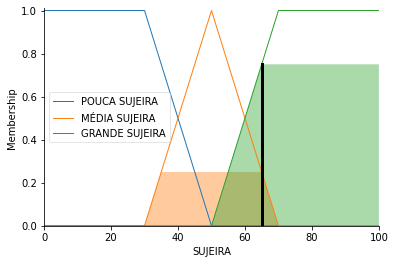

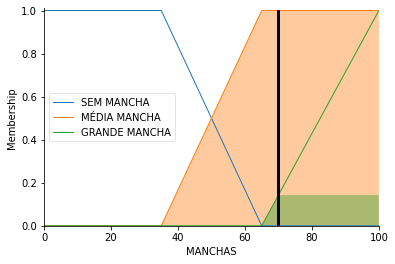

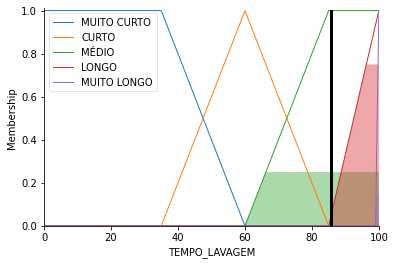

In [46]:
sujeira.view(sim=tempo_lavagem_simulador)
manchas.view(sim=tempo_lavagem_simulador)
tempo_lavagem.view(sim=tempo_lavagem_simulador)
print("O tempo de lavagem será de", tempo_lavagem_simulador.output['TEMPO_LAVAGEM'])